# Convolutional Neural Network

In [4]:
import pandas as pd
from finlab.data import Data
data = Data()
twii = data.get("發行量加權股價指數")
twii = twii['台股指數']
twii = twii.resample('1D').first().dropna()

In [5]:
##t1 = indexes.tolist()
##print(indexs)

## 製作features

In [8]:
import numpy as np
import tqdm
time_period = 200

cnn_x = []
cnn_y = []
indexs = []
for i in tqdm.notebook.tqdm(range(0, len(twii) - time_period - 1 - 11, 3)):
    s = twii.iloc[i:i+time_period].values
    cnn_x.append((s - s.min())/(s.max() - s.min()))
    r = twii.iloc[i+time_period+10] / twii.iloc[i+time_period-1]
    cnn_y.append(r)
    indexs.append(twii.index[i+time_period-1])

cnn_x = np.array(cnn_x)
cnn_y = np.array(cnn_y)
indexes = np.array(indexs)




  0%|          | 0/1351 [00:00<?, ?it/s]

In [9]:
from ipywidgets import interact

@interact(x=(0, 100, 10))
def p(x=80):
    pass

interactive(children=(IntSlider(value=80, description='x', step=10), Output()), _dom_classes=('widget-interact…

## Reshape features and labels

In [10]:
cnn_x = cnn_x.reshape(len(cnn_x), time_period, 1)
cnn_y = cnn_y.reshape(len(cnn_y), 1)

## Split traning and testing data

In [11]:
import datetime
cnn_x_train = cnn_x[indexes < datetime.datetime(2021,1,1)]
cnn_y_train = cnn_y[indexes < datetime.datetime(2021,1,1)]

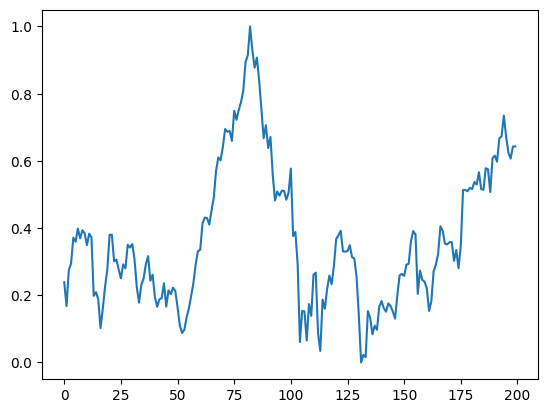

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cnn_x[0].reshape(1, len(cnn_x[0]))[0])


## CNN

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = cnn_x[0].shape
time_period = 200
num_classes = 1

model = keras.Sequential()

model.add(tf.keras.layers.Conv1D(filters=20, kernel_size=20, activation='relu', input_shape=cnn_x[0].shape))
model.add(tf.keras.layers.AveragePooling1D(5))

model.add(tf.keras.layers.Conv1D(filters=20, kernel_size=20, activation='relu'))
model.add(tf.keras.layers.AveragePooling1D(5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=84, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=1, ))#activation = 'softmax'))


##adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.99, epsilon=None, decay=0.01, amsgrad=False)
adam = keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.99, epsilon=None, amsgrad=False)


model.compile(loss='mse',
                optimizer=adam)

print(model.summary())

history = model.fit(cnn_x_train, cnn_y_train,
                    batch_size=200,
                    epochs=500,
                    verbose=1,
                    validation_split=0.1,
                    #callbacks=[get_best_model]
                   )

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 181, 20)           420       
                                                                 
 average_pooling1d_14 (Avera  (None, 36, 20)           0         
 gePooling1D)                                                    
                                                                 
 conv1d_15 (Conv1D)          (None, 17, 20)            8020      
                                                                 
 average_pooling1d_15 (Avera  (None, 3, 20)            0         
 gePooling1D)                                                    
                                                                 
 flatten_7 (Flatten)         (None, 60)                0         
                                                                 
 dense_28 (Dense)            (None, 120)              

ValueError: in user code:

    File "C:\Users\orang\.conda\envs\finlab\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\orang\.conda\envs\finlab\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\orang\.conda\envs\finlab\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\orang\.conda\envs\finlab\lib\site-packages\keras\engine\training.py", line 1027, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\orang\.conda\envs\finlab\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 527, in minimize
        self.apply_gradients(grads_and_vars)
    File "C:\Users\orang\.conda\envs\finlab\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1140, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "C:\Users\orang\.conda\envs\finlab\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 634, in apply_gradients
        iteration = self._internal_apply_gradients(grads_and_vars)
    File "C:\Users\orang\.conda\envs\finlab\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1169, in _internal_apply_gradients
        grads_and_vars,
    File "C:\Users\orang\.conda\envs\finlab\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1217, in _distributed_apply_gradients_fn
        var, apply_grad_to_update_var, args=(grad,), group=False
    File "C:\Users\orang\.conda\envs\finlab\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1213, in apply_grad_to_update_var  **
        return self._update_step(grad, var)
    File "C:\Users\orang\.conda\envs\finlab\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 224, in _update_step
        self.update_step(gradient, variable)
    File "C:\Users\orang\.conda\envs\finlab\lib\site-packages\keras\optimizers\optimizer_experimental\adam.py", line 200, in update_step
        variable.assign_sub((m * alpha) / (tf.sqrt(v) + self.epsilon))

    ValueError: None values not supported.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.log(history.history['loss'][1:]))
plt.plot(np.log(history.history['val_loss']))

In [ ]:
ey = model.predict(cnn_x)
ey = pd.Series(ey.swapaxes(0, 1)[0], index=indexes)

In [ ]:

eq = twii[pd.to_datetime(indexes)]
gain = (eq.shift(-1) - eq)

signal = (ey > ey.quantile(0.9)).rolling(20).sum() > 0
eq = (gain[signal])['2022':].cumsum()
eq.plot()

In [ ]:
signal['2022':].astype(int).diff().abs().sum()

In [ ]:
eq.tail()

In [ ]:
# 預測所有日期的漲跌幅度
predicted_returns = model.predict(cnn_x)



In [ ]:
# 找出符合條件的日期（假設要找出漲幅大於 2% 的日期）
threshold = 0.01
signal_dates = indexes[predicted_returns[:, 0] > (1 + threshold)]

# 輸出符合條件的日期
print(signal_dates)


In [ ]:
predicted_returns_list = signal_dates.tolist()
predicted_returns_list

In [ ]:
print(indexes[-10:])